<a href="https://colab.research.google.com/github/adamusengamana/Project_-50_Companies_Model-/blob/main/Project_50_Companies_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**50 COMPANIES REGRESSION MODEL**
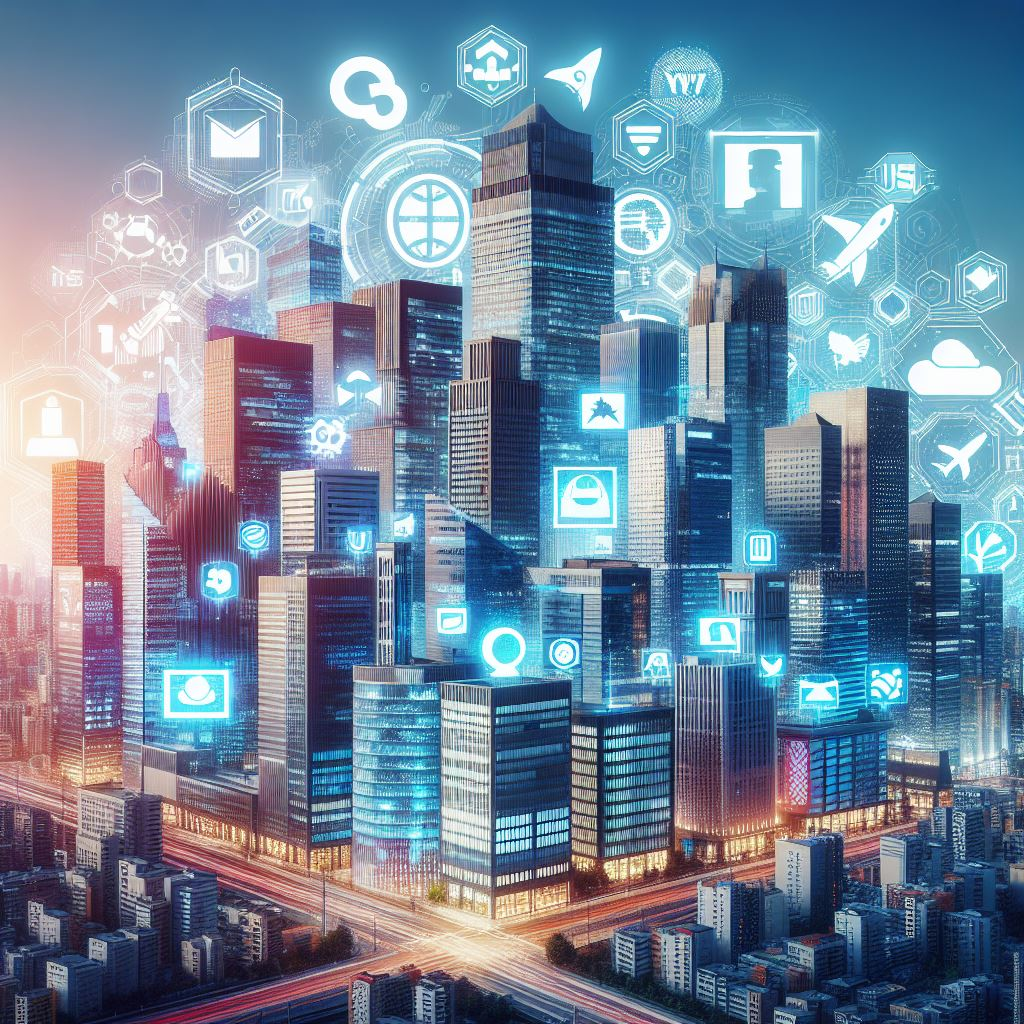


##**Introduction**

In the given dataset, R&D Spend, Administration Cost and Marketing Spend of 50 Companies
are given along with the profit earned. **The target is to prepare an ML model which can predict the profit value of a company** if the value of its R&D Spend, Administration Cost and Marketing
Spend are given.



 * Construct Different Regression algorithms
 * Divide the data into train set and test set
 * Calculate different regression metrics
 * Choose the best model

### Table of Contents


*  Import Libraries
*  EDA(Exploratory Data Analysis)
 *   Display Number of Examples in the dataset
 *   Visualize Each Class in the dataset
 *   Calculate average profit for each feature
 *   Check Outliers
*  Model Selection
 *   Loading Regression Models
 *   Splitting Data Set into Train And Test Sets
 *   Training Models
*  Evaluating the Model
*  Save The Model
*  Making Predictions
*  Conclusion










## **Import Libraries**

Pandas version 2.0.3

Numpy version 1.25.2

seaborn version 0.13.1

In [ ]:
import pandas as pd
import numpy as np
import joblib
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.preprocessing import StandardScaler
print("Modules Loaded............")

## **EDA(Exploratory Data Analysis)**

In [ ]:
url= "https://drive.google.com/file/d/1Z7RKmScBO7n9vcDIG3Xeo853Ics4QFaF/view"
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)
ds_name = '50_Startups'

<a id="3.3"></a>

### <b> <span style='color:#B21010'></span> Display Number of Examples in the dataset</b>

In [ ]:
def num_of_examples(df, name='df'):
    print(f"The {name} dataset has {df.shape[0]} Records.")

num_of_examples(df, ds_name)

In [ ]:
print(df.shape)
df.head()

In [ ]:
df.isnull().sum()

In [ ]:
print (df.info())


In [ ]:
df.duplicated().sum()

In [ ]:
df.drop_duplicates(inplace=True)
df.shape

<a id="3.6"></a>
### <b> <span style='color:#B21010'></span> Visualize Each Class in the dataset</b>

In [ ]:
plt.plot(df['R&D Spend'],c='black',marker='.',linewidth=3, markersize=12,label='R&D Spend')
plt.plot(df['Administration'],c='blue',marker='.',linewidth=3, markersize=12,label='Administration')
plt.plot(df['Marketing Spend'],c='red',marker='.',linewidth=3, markersize=10,label='Marketing Spend')
plt.plot(df['Profit'],c='green',marker='.',linewidth=3, markersize=12,label='Profit')
plt.title('50 Startups DATASET',fontdict={'fontsize': 30,'fontweight': 700,})
plt.legend()
plt.show()

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['R&D Spend'], df['Profit'], label='R&D Spend')
plt.scatter(df['Administration'], df['Profit'], label='Administration')
plt.scatter(df['Marketing Spend'], df['Profit'], label='Marketing Spend')

plt.xlabel('Features Values')
plt.ylabel('Profit')
plt.title('Profit vs. Features')
plt.legend()
plt.grid(True)
plt.show()

### **Calculate average profit for each feature**


In [ ]:
avg_profit_rd = np.mean(df['R&D Spend'])
avg_profit_admin = np.mean(df['Administration'])
avg_profit_marketing = np.mean(df['Marketing Spend'])

# Create a bar chart
plt.figure(figsize=(8, 6))
plt.bar(['R&D Spend', 'Administration', 'Marketing Spend'],
        [avg_profit_rd, avg_profit_admin, avg_profit_marketing])

plt.xlabel('Feature')
plt.ylabel('Average Profit')
plt.title('Average Profit by Feature')
plt.grid(axis='y')
plt.show()

### **Check Outliers**

In [ ]:
# Box Plots
fig, axs = plt.subplots(9,1,dpi=95, figsize=(7,17))
i = 0
for col in df.columns:
	axs[i].boxplot(df[col], vert=False)
	axs[i].set_ylabel(col)
	i+=1
plt.show()


###**Correlation**

In [ ]:
corr = df.corr()

plt.figure(dpi=130)
sns.heatmap(df.corr(), annot=True, fmt= '.2f')
plt.show()

## **Model Selection**

###**Loading Regression Models**

In [ ]:
# Loading and training models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(n_estimators=100)
}

###**Splitting Data Set into Train And Test Sets**

In [ ]:
# Splitting dataset
X = df[['R&D Spend', 'Administration', 'Marketing Spend']]
y = df['Profit']
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, test_size=0.2, random_state=42)

### **Training the Models**

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)

## **Evaluating the Models**

In [ ]:
Best_model = None
Best_r2 = 0
for name, model in models.items():
    y_pred = model.predict(X_test)
    print(f'{name} MAE: {mean_absolute_error(y_test, y_pred)}')
    print(f'{name} MSE: {mean_squared_error(y_test, y_pred)}')
    print(f'{name} R2: {r2_score(y_test, y_pred)}')
    if Best_model is None or r2_score(y_test, y_pred) > Best_r2:
        Best_model = model
        Best_r2 = r2_score(y_test, y_pred)


In [ ]:

print(f'Best Model: {Best_model}')
print(f'Best R2: {Best_r2}')

In [ ]:
#Best_model
Bestmodel_predictions=Best_model.predict(X_test)

results = pd.DataFrame({'Actual': y_test, 'Predicted': Bestmodel_predictions})
plt.scatter(y_test,Bestmodel_predictions,color='blue')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()
print(results)

In [ ]:
sns.displot((y_test-Bestmodel_predictions))

##**Save The Model**

In [ ]:
filename= "Best_model"
joblib.dump(Best_model, filename)

##**Making Predictions**

In [ ]:
filename= "Best_model"
Profit_predictor= joblib.load(filename)

In [ ]:
Name=input("Enter Company Name: ")
Address=input("Enter Address: ")
State_or_Province=input("Enter State or Province: ")
Country=input("Enter Country: ")
RD_Spend=float(input("Enter R&D Spend money: "))
Administration=float(input("Enter Administration money: "))
Marketing_Spend=float(input("Enter Marketing Spend money: "))
Company_data = np.array([[RD_Spend,Administration,Marketing_Spend]])
Profit_prediction = Profit_predictor.predict(Company_data)
print(f"\nTHE PREDICTION RESULTS\n\nName:{Name}\nAddress:{Address}\nState_or_Province:{State_or_Province}\nCountry:{Country}\nProfit_prediction: {Profit_prediction}")


## **Conclusion**

Regression models can be used to estimate how a dependent variable (Target) changes as the independent variables (Predictors) do.

LinearRegression() provided with us the slightly highest accuracy among the accuracies of other models,although there are many more regression models such as Bayesian regression, Quantile regression, Lasso regression,and so on.


The model that I just developed is accurate enough to be relied on with an accuracy of **0.90** which is fascinating for a regression model.

This model will be used in various applications to predict the profits, specifically **The model can be used in its own GUI application built using some Python modules (Tkinter,NiceGui,...) or can be embedded in any application software to improve and add new desirable functionality.**